## Preparation

##### Import Functions

In [1]:
from Scripts.LoadCSV import LoadCSV as LoadCSV
from Scripts.Fuzzify import Fuzzify as Fuzzify
from Scripts.OptimizeBruteForceKFold import OptimizeBruteForceKFold as OptimizeBruteForceKFold
from Scripts.ValueTest import ValueTest as ValueTest
from Scripts.OptimizeBruteForce import OptimizeBruteForce as OptimizeBruteForce
from Class.Helper import Helper as Helper
import warnings
warnings.simplefilter("ignore")

import Settings.GeneralSettings as generalSettings

# import Settings.SettingsBreastCancerData as settings
# import Settings.SettingsBreastCancerWisconsin as settings
# import Settings.SettingsDataBanknoteAuthentication as settings
# import Settings.SettingsHaberman as settings
# import Settings.SettingsHeart as settings
# import Settings.SettingsHTRU as settings
# import Settings.SettingsImmunotherapy as settings
# import Settings.SettingsIndianLiverPatient as settings
import Settings.SettingsPimaIndians as settings

##### Load CSV File

In [2]:
if generalSettings.mode == 0:
    loadCSV = LoadCSV()
    samples_stats, train_stats, test_stats, train_samples = loadCSV.worker(settings)

##### Fuzzify Data

In [3]:
if generalSettings.mode == 0:
    fuzzify = Fuzzify()
    changed_decisions, features_number_after_reduct, implicants_number, fuzzify_parameters = fuzzify.worker(settings, "", -1)

In [4]:
if generalSettings.mode == 0:
    helper = Helper()

    fuzzification_data = [settings["dataset_name"], settings["gausses"], samples_stats, train_stats, test_stats, changed_decisions, round(changed_decisions / train_samples, 2), implicants_number, settings["feature_numbers"], features_number_after_reduct]
    helper.saveFuzzificationStats(fuzzification_data)

    fuzzification_parameters_data = [settings["dataset_name"], settings["gausses"], settings.sigma_mean_params] + fuzzify_parameters
    helper.saveFuzzificationParameters(fuzzification_parameters_data)

## Train Set - K-Fold

##### Train Set | K-Fold - S Function Optymalization

In [5]:
if generalSettings.mode == 1:
    optimizeBruteForceKFold = OptimizeBruteForceKFold(settings, settings.s_function_width)

In [6]:
if generalSettings.mode == 1:
    best_s_function_center, mean_s_function_center = optimizeBruteForceKFold.worker(settings, settings.constraints, settings.s_function_width, settings.n_folds)

## Test Set | K-Fold Test

In [7]:
if generalSettings.mode == 1:
    valueTest = ValueTest(settings, settings.s_function_width, False)

##### K-Fold Test Set | S Function Value

In [8]:
if generalSettings.mode == 1:
    valueTest.sOptymalizationWorker(settings, best_s_function_center, "Test Value - K-Fold - Best Function Center")

In [9]:
if generalSettings.mode == 1:
    valueTest.sOptymalizationWorker(settings, mean_s_function_center, "Test Value - K-Fold - Average Function Center")

## Training Set

In [10]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    valueTest = ValueTest(settings, settings.s_function_width, True)

##### Training Set | No Optymalization

-----------------------------------------------------------------------------------
Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F-Score: [1. 1.]
Support: [209 104]
-----------------------------------------------------------------------------------
Center Point: 0.5
Time: 40.68183398246765
-----------------------------------------------------------------------------------


,F0,F1,F6,F4,F2,F7,F5,F3,Decision,Decision Fuzzy,Predicted Value
42,0.0588235,0.105634,0.101927,0.0745192,0.27907,0.0166667,0.0449898,0.196429,negatif,negatif,0.251589
253,0.117647,0.176056,0.197859,0.0745192,0.55814,0.0666667,0.243354,0.142857,negatif,negatif,0.251714
335,0.294118,0.471831,0.0788009,0.0757212,0.581395,0.116667,0.325153,0.589286,negatif,negatif,0.263981
22,0.294118,0.225352,0.110064,0.0108173,0.488372,0.15,0.126789,0.25,negatif,negatif,0.288217
48,0.176471,0.190141,0.107495,0.00480769,0.395349,0.0666667,0.329243,0.428571,negatif,negatif,0.289936
284,0.176471,0.197183,0.216702,0.110577,0.511628,0.0666667,0.280164,0.410714,negatif,negatif,0.290367
291,0.117647,0.274648,0.28394,0.0889423,0.348837,0.0166667,0.161554,0.125,negatif,negatif,0.292857
256,0.117647,0.429577,0.0976445,0.0685096,0.767442,0,0.143149,0.214286,negatif,negatif,0.292857
74,0.117647,0.302817,0.236403,0.0961538,0.325581,0,0.130879,0.142857,negatif,negatif,0.292858
126,0.294118,0.28169,0.390578,0.0637019,0.581395,0.366667,0.314928,0.196429,negatif,negatif,0.308719


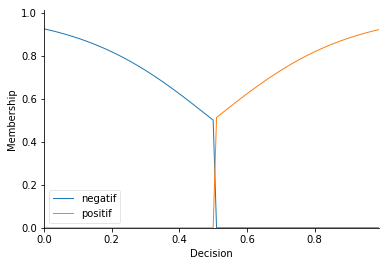

In [11]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    valueTest.noOptymalizationWorker(settings)

##### Training Set | S Function Optymalization

In [12]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    optimizeBruteForce = OptimizeBruteForce(settings, settings.s_function_width)

Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F-Score: [1. 1.]
Support: [209 104]
-----------------------------------------------------------------------------------
Center Point: 0.5
Time: 2207.605041742325
-----------------------------------------------------------------------------------


,F3,F2,F0,F5,F1,F7,F4,F6,Decision,Decision Fuzzy,Predicted Value
42,0.196429,0.27907,0.0588235,0.0449898,0.105634,0.0166667,0.0745192,0.101927,negatif,negatif,0.251589
253,0.142857,0.55814,0.117647,0.243354,0.176056,0.0666667,0.0745192,0.197859,negatif,negatif,0.251714
335,0.589286,0.581395,0.294118,0.325153,0.471831,0.116667,0.0757212,0.0788009,negatif,negatif,0.263981
22,0.25,0.488372,0.294118,0.126789,0.225352,0.15,0.0108173,0.110064,negatif,negatif,0.288217
48,0.428571,0.395349,0.176471,0.329243,0.190141,0.0666667,0.00480769,0.107495,negatif,negatif,0.289936
284,0.410714,0.511628,0.176471,0.280164,0.197183,0.0666667,0.110577,0.216702,negatif,negatif,0.290367
291,0.125,0.348837,0.117647,0.161554,0.274648,0.0166667,0.0889423,0.28394,negatif,negatif,0.292857
256,0.214286,0.767442,0.117647,0.143149,0.429577,0,0.0685096,0.0976445,negatif,negatif,0.292857
74,0.142857,0.325581,0.117647,0.130879,0.302817,0,0.0961538,0.236403,negatif,negatif,0.292858
126,0.196429,0.581395,0.294118,0.314928,0.28169,0.366667,0.0637019,0.390578,negatif,negatif,0.308719


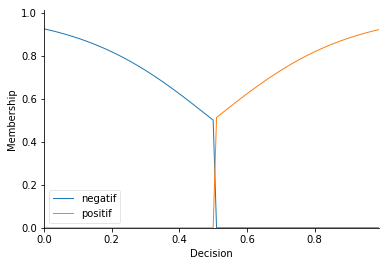

In [13]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    s_function_center = optimizeBruteForce.sFunctionsWorker(settings, settings.constraints, settings.s_function_width)

##### Training Set | Threshold Optymalization

Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F-Score: [1. 1.]
Support: [209 104]
-----------------------------------------------------------------------------------
Center Point: 0.5
Threshold: 0.47658852123895384
Train Accuracy: 1.0
Time: 77.77691268920898
-----------------------------------------------------------------------------------


,F5,F3,F0,F1,F7,F6,F2,F4,Decision,Decision Fuzzy,Predicted Value
42,0.0449898,0.196429,0.0588235,0.105634,0.0166667,0.101927,0.27907,0.0745192,negatif,negatif,0.251589
253,0.243354,0.142857,0.117647,0.176056,0.0666667,0.197859,0.55814,0.0745192,negatif,negatif,0.251714
335,0.325153,0.589286,0.294118,0.471831,0.116667,0.0788009,0.581395,0.0757212,negatif,negatif,0.263981
22,0.126789,0.25,0.294118,0.225352,0.15,0.110064,0.488372,0.0108173,negatif,negatif,0.288217
48,0.329243,0.428571,0.176471,0.190141,0.0666667,0.107495,0.395349,0.00480769,negatif,negatif,0.289936
284,0.280164,0.410714,0.176471,0.197183,0.0666667,0.216702,0.511628,0.110577,negatif,negatif,0.290367
291,0.161554,0.125,0.117647,0.274648,0.0166667,0.28394,0.348837,0.0889423,negatif,negatif,0.292857
256,0.143149,0.214286,0.117647,0.429577,0,0.0976445,0.767442,0.0685096,negatif,negatif,0.292857
74,0.130879,0.142857,0.117647,0.302817,0,0.236403,0.325581,0.0961538,negatif,negatif,0.292858
126,0.314928,0.196429,0.294118,0.28169,0.366667,0.390578,0.581395,0.0637019,negatif,negatif,0.308719


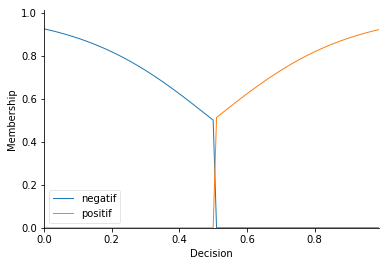

In [14]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    threshold = optimizeBruteForce.thresholdWorker(settings, s_function_center, settings.s_function_width)

## Test Set

##### Test Set | No Optymalization 

-----------------------------------------------------------------------------------
Accuracy: 0.7341772151898734
Precision: [0.72222222 0.85714286]
Recall: [0.98113208 0.23076923]
F-Score: [0.832      0.36363636]
Support: [53 26]
-----------------------------------------------------------------------------------
Center Point: 0.5
Time: 22.058404207229614
-----------------------------------------------------------------------------------


,F7,F3,F5,F2,F4,F6,F1,F0,Decision,Decision Fuzzy,Predicted Value
214,0,0.196429,0.159509,0.511628,0.0745192,0.203854,0.267606,0.117647,negatif,negatif,0.267243
166,0.0666667,0.160714,0.296524,0.395349,0.0456731,0.0346895,0.21831,0.117647,negatif,negatif,0.314075
266,0.0666667,0.446429,0.139059,0.534884,0.0625,0.0436831,0.084507,0.117647,negatif,negatif,0.327172
182,0.0166667,0.160714,0.190184,0.72093,0.0625,0.0946467,0.176056,0.176471,negatif,negatif,0.328087
97,0.1,0.160714,0.0449898,0.534884,0.0360577,0.0642398,0.302817,0.117647,negatif,negatif,0.360524
361,0.1,0.232143,0.208589,0.604651,0.103365,0.0141328,0.380282,0.235294,negatif,negatif,0.380239
127,0,0.446429,0.143149,0.44186,0.0504808,0.0184154,0.366197,0.117647,negatif,negatif,0.388263
175,0.05,0.0892857,0.184049,0.44186,0.0348558,0.211991,0.239437,0.0588235,negatif,negatif,0.391914
121,0.05,0.125,0.126789,0.651163,0.0492788,0.0702355,0.239437,0.117647,negatif,negatif,0.393971
311,0.0666667,0.321429,0.0265849,0.44186,0.0324519,0.170021,0.253521,0.0588235,negatif,negatif,0.396077


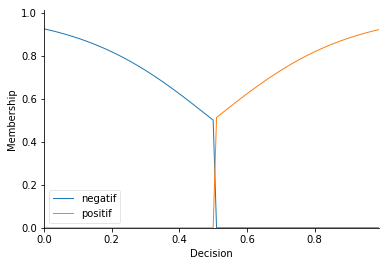

In [15]:
if generalSettings.mode == 3 or generalSettings.mode == 4:
    valueTest = ValueTest(settings, settings.s_function_width, False)
    valueTest.noOptymalizationWorker(settings)

##### Test Set | S Function Value

-----------------------------------------------------------------------------------
Accuracy: 0.7341772151898734
Precision: [0.72222222 0.85714286]
Recall: [0.98113208 0.23076923]
F-Score: [0.832      0.36363636]
Support: [53 26]
-----------------------------------------------------------------------------------
Center Point: 0.5
Time: 21.72565984725952
-----------------------------------------------------------------------------------


,F7,F3,F0,F5,F2,F4,F6,F1,Decision,Decision Fuzzy,Predicted Value
214,0,0.196429,0.117647,0.159509,0.511628,0.0745192,0.203854,0.267606,negatif,negatif,0.267243
166,0.0666667,0.160714,0.117647,0.296524,0.395349,0.0456731,0.0346895,0.21831,negatif,negatif,0.314075
266,0.0666667,0.446429,0.117647,0.139059,0.534884,0.0625,0.0436831,0.084507,negatif,negatif,0.327172
182,0.0166667,0.160714,0.176471,0.190184,0.72093,0.0625,0.0946467,0.176056,negatif,negatif,0.328087
97,0.1,0.160714,0.117647,0.0449898,0.534884,0.0360577,0.0642398,0.302817,negatif,negatif,0.360524
361,0.1,0.232143,0.235294,0.208589,0.604651,0.103365,0.0141328,0.380282,negatif,negatif,0.380239
127,0,0.446429,0.117647,0.143149,0.44186,0.0504808,0.0184154,0.366197,negatif,negatif,0.388263
175,0.05,0.0892857,0.0588235,0.184049,0.44186,0.0348558,0.211991,0.239437,negatif,negatif,0.391914
121,0.05,0.125,0.117647,0.126789,0.651163,0.0492788,0.0702355,0.239437,negatif,negatif,0.393971
311,0.0666667,0.321429,0.0588235,0.0265849,0.44186,0.0324519,0.170021,0.253521,negatif,negatif,0.396077


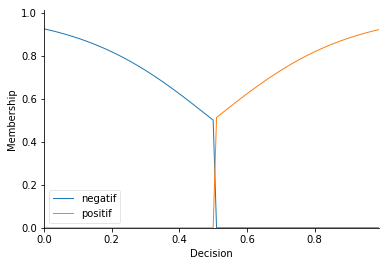

In [16]:
if generalSettings.mode == 3 or generalSettings.mode == 4:
    valueTest.sOptymalizationWorker(settings, s_function_center)

##### Test Set | Threshold Value

-----------------------------------------------------------------------------------
Accuracy: 0.5949367088607594
Precision: [0.86206897 0.44      ]
Recall: [0.47169811 0.84615385]
F-Score: [0.6097561  0.57894737]
Support: [53 26]
-----------------------------------------------------------------------------------
Center Point: 0.5
Threshold: 0.47658852123895384
Test Accuracy: 0.5949367088607594
Time: 22.445160388946533
-----------------------------------------------------------------------------------


,F7,F3,F0,F5,F2,F4,F6,F1,Decision,Decision Fuzzy,Predicted Value
214,0,0.196429,0.117647,0.159509,0.511628,0.0745192,0.203854,0.267606,negatif,negatif,0.267243
166,0.0666667,0.160714,0.117647,0.296524,0.395349,0.0456731,0.0346895,0.21831,negatif,negatif,0.314075
266,0.0666667,0.446429,0.117647,0.139059,0.534884,0.0625,0.0436831,0.084507,negatif,negatif,0.327172
182,0.0166667,0.160714,0.176471,0.190184,0.72093,0.0625,0.0946467,0.176056,negatif,negatif,0.328087
97,0.1,0.160714,0.117647,0.0449898,0.534884,0.0360577,0.0642398,0.302817,negatif,negatif,0.360524
361,0.1,0.232143,0.235294,0.208589,0.604651,0.103365,0.0141328,0.380282,negatif,negatif,0.380239
127,0,0.446429,0.117647,0.143149,0.44186,0.0504808,0.0184154,0.366197,negatif,negatif,0.388263
175,0.05,0.0892857,0.0588235,0.184049,0.44186,0.0348558,0.211991,0.239437,negatif,negatif,0.391914
121,0.05,0.125,0.117647,0.126789,0.651163,0.0492788,0.0702355,0.239437,negatif,negatif,0.393971
311,0.0666667,0.321429,0.0588235,0.0265849,0.44186,0.0324519,0.170021,0.253521,negatif,negatif,0.396077


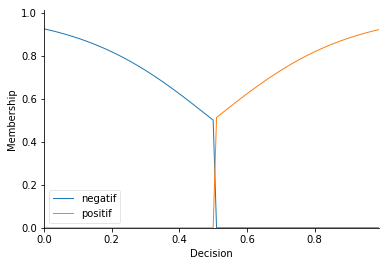

In [17]:
if generalSettings.mode == 3 or generalSettings.mode == 4:
    valueTest.thresholdWorker(settings, s_function_center, threshold)